<a href="https://colab.research.google.com/github/Aditya-1998k/Aditya-1998k/blob/main/Machine_Learning_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. **Linear Regression**

1. Data point linearly seperated
2. Target Value is continuous value

  `y = mx + c`

  `dependent var(Target) = slope(Model) * Independent Var (Features) + Intercept(Constant)`

  ```
  Suppose Y = Height(cm) and Weight(cm)
  X(input) weight                  y (output) Height
   73                                  145
   59                                  130
   70                                  158
   80                                  162
  ```
  `145 = M * 73 + c for first Sample`
  `130 = M * 59 + c for 2nd Sample`

  Now, the task of the machine learning is to give the value of **`M(slope)`** so that, we can use that to **predict** the value of the height by inputing weight.

  `Task is to Find the best value of M with linear regression Model.`
  `If the model prediction is near to the actual means more accurate.`
  `M(slope) vary from -1 to 1 where 1 & -1 means Highly related and 0 means no relation.`

  Now, if there is some difference between actual and predicted that is called loss. Our Model task is to reduce the loss.
  `Loss = Y_actual - Y_predicted`

  `Training Data`: Trained the model and get the value of M

  `Test Data`: We have input and output data, but we will give only input data to model, and get the predicted value `Loss = Actual - Predicted`. Will Reduce the loss with some technique and get the best value of M which is called **`best fit Line`**.

  Note: If my line origin starting from (0,0) in such case value of constant(c) will be zero.







### **`Simple Linear Regression`**

Note: Using advertising data where features are tv, radio, newspaper cost for advertising and target value is sales.


#### Basic Understanding of the DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('advertising.csv')

In [ ]:
data.head()

Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [ ]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
data.head(1)

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1

In [ ]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
data.shape

(200, 4)

In [ ]:
# data.describe()

In [ ]:
# data.isna().sum()

<Axes: xlabel='newspaper', ylabel='sales'>

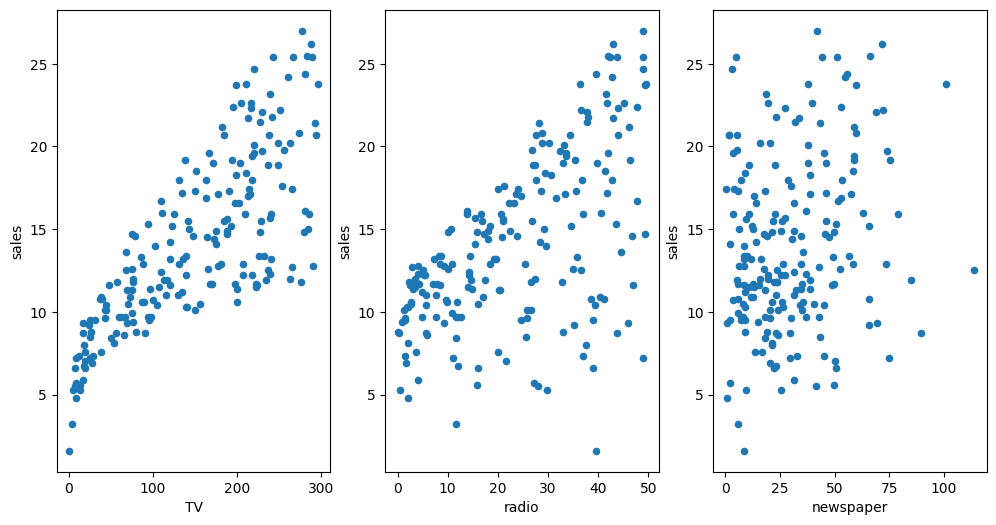

In [ ]:
fig, axs = plt.subplots(1,3)
data.plot(kind = 'scatter', x = 'TV', y = 'sales', ax = axs[0], figsize = (12,6))
data.plot(kind = 'scatter', x = 'radio', y = 'sales', ax = axs[1])
data.plot(kind = 'scatter', x = 'newspaper', y = 'sales', ax = axs[2])


From the Above plot we come to know `TV vs Sales` is most linear and `newspaper vs sales` is worst

```
fig, axs = plt.subplots(1,3)
Here we are using matplotlib.pyplot to use subplot to plot 3 subplot on 1 axis

data.plot(kind = 'scatter', x = 'TV', y = 'sales', ax = axs[0], figsize = (12,6))

means data.plot with kind as scatter and x axis will be tv and y axis will be sales
ax here will be which columns and figsize will 12,6 means height and width
```

`Y = MX + C`


*   x = independent var (tv)
*   y = dependent var (sales)



In [ ]:
indepenent_var = data[['TV']]
target = data[['sales']].values

#### Training & Testing the Model

1. X_train (input) and Y_train(target)  used for training the Model
and get the value of M

2. X_test (input) and Y_test(target) used to test the model and get the y_predicted, with y_test and y_predicted we can find the loss

`train_test_split(independent_var, dependent_var, test_size = 0.25, random_state = 42)`

for splitting we can use `train_size` or `test_size`

`Random_state is for suffuling the data, and 42 is used for most of the research purpose and it gives best results in most of the cases.`

`42 is called Magic Number is referenced from Hitchhiker guide to galaxy book`




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(indepenent_var, target, test_size = 0.20, random_state = 42)

In [ ]:
print('X train shape', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X train shape (160, 1)
X_test (40, 1)
y_train (160, 1)
y_test (40, 1)


#### Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

my_first_model = LinearRegression()
my_first_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(my_first_model.coef_)  # M(Slope)
print(my_first_model.intercept_) # C (Constant)

[[0.04652973]]
[7.11963843]


#### Testing the Model

In [ ]:
predicted_value = my_first_model.predict(X_test)
len(predicted_value)

40

Now I want to calculate the Loss by using predicted value and actual value

1. r2_score : confidence score
2. mean_squared_error
3. mean_absolute_error

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_test, predicted_value)

10.204654118800956

In [ ]:
mean_absolute_error(y_test, predicted_value)

2.444420003751042

In [ ]:
r2_score(y_test, predicted_value)

0.6766954295627076

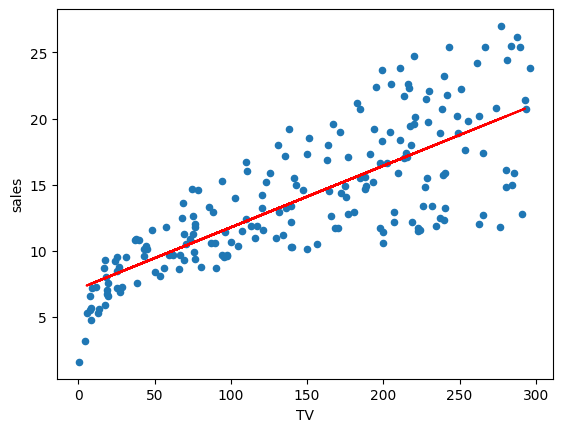

In [ ]:
data.plot(kind = 'scatter', x = 'TV', y = 'sales')
plt.plot(X_test, predicted_value, c = 'red')

What we did?
` y = M * TV + c`
It is simple linear regression, but now we will use Multiple Linear regression

### **`Multiple Linear Regression`**
Only one feature cannot give what the result we are looking, in such case we can go for multiple linear regression when there is more than one feature available and affecting the sales

`sales = m1*x(tv) + m2 * x(radio) + m3* x(newspaper)`

In [ ]:
features = data[['TV', 'radio', 'newspaper']]
target = data[['sales']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size = 0.20,
    random_state = 42
)

#### Training & Testing the Model

In [ ]:
my_multiple_lr = LinearRegression()
my_multiple_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(my_multiple_lr.coef_)
print(my_multiple_lr.intercept_)
multiple_predicted_value = my_multiple_lr.predict(X_test)

[[0.04472952 0.18919505 0.00276111]]
[2.97906734]


In [ ]:
print(mean_squared_error(y_test, multiple_predicted_value))
print(mean_absolute_error(y_test, multiple_predicted_value))
print(r2_score(y_test, multiple_predicted_value))

3.1740973539761033
1.4607567168117603
0.899438024100912


## **Polynomial Regression**

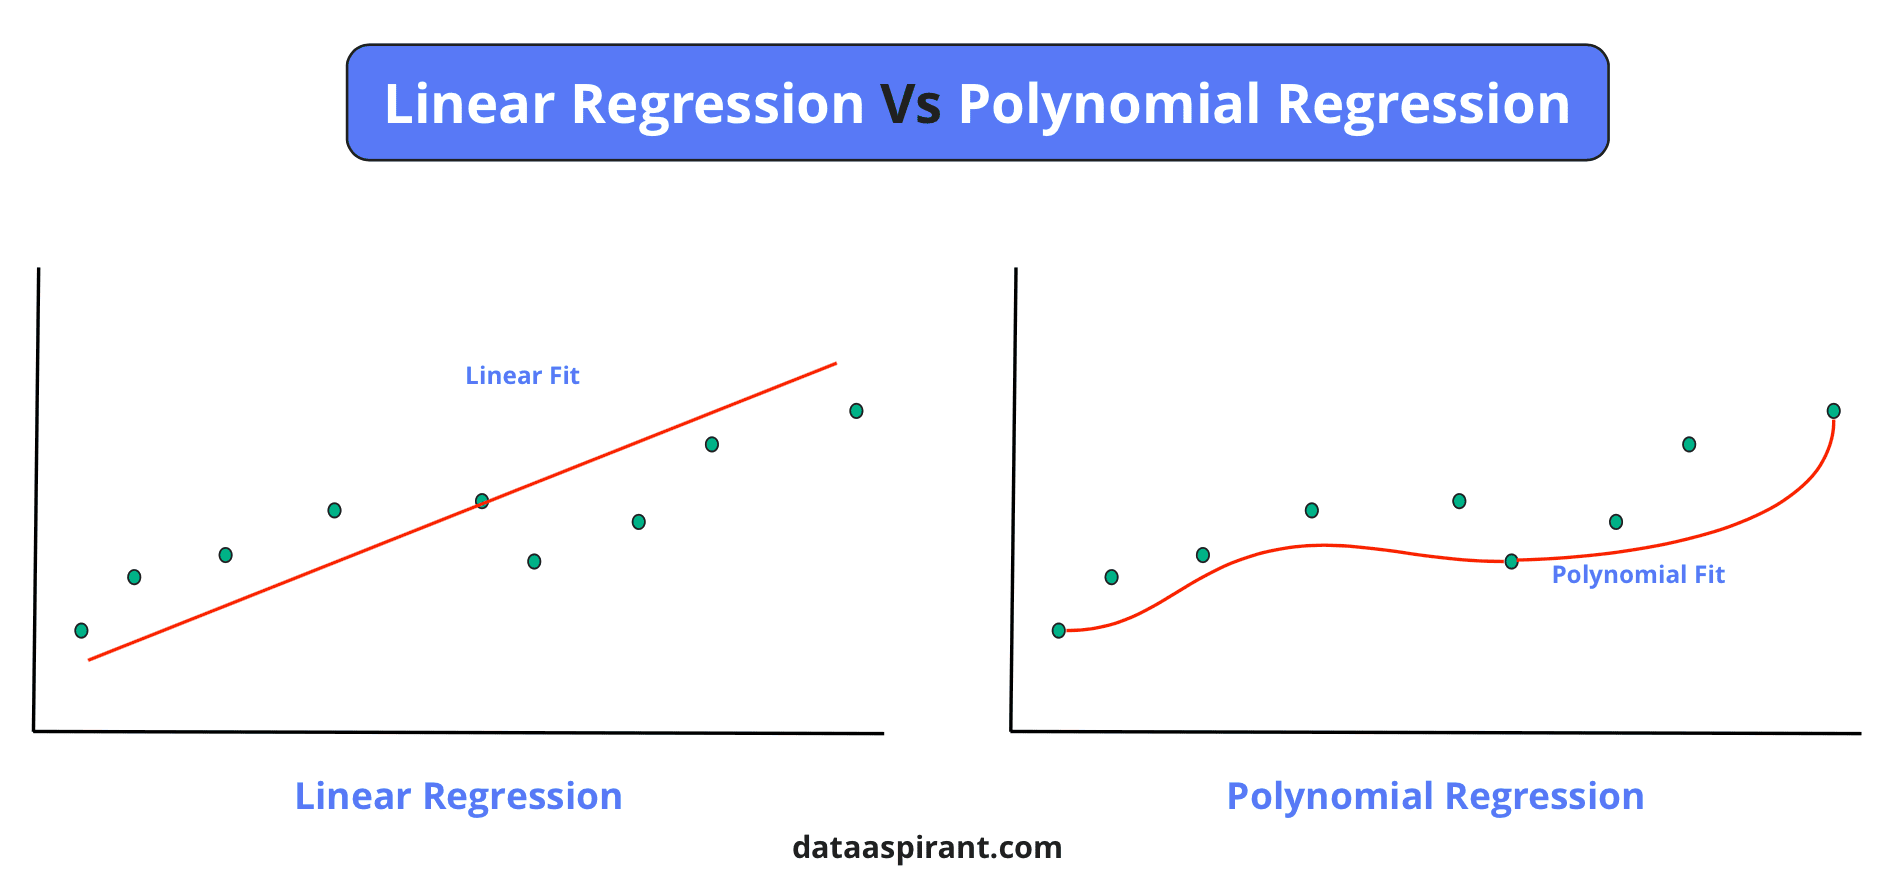

A polynomial regressin defines the relationship between independent variable and dependent variable as nth degree polynomial.

`y = m1 * x1 + m2 * x2^2 + m3 * x3^3 + .......+ mn * xn^n`

Here Our lines will be not straight lines, instead of that it will be the curvy lines

#### Implementing Polynomial Regression with degree 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
features_poly = PolynomialFeatures(degree=2)

tv_poly = features_poly.fit_transform(features[['TV']])
radio_poly = features_poly.fit_transform(features[['radio']])
newspaper_poly = features_poly.fit_transform(features[['newspaper']])

In [ ]:
poly_df = pd.concat([pd.DataFrame(tv_poly), pd.DataFrame(radio_poly), pd.DataFrame(newspaper_poly)], axis=1)

In [ ]:
poly_df.head(3)

0      1         2    0     1        2    0     1        2
0  1.0  230.1  52946.01  1.0  37.8  1428.84  1.0  69.2  4788.64
1  1.0   44.5   1980.25  1.0  39.3  1544.49  1.0  45.1  2034.01
2  1.0   17.2    295.84  1.0  45.9  2106.81  1.0  69.3  4802.49

### Training and Testing the Model




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_df, target, test_size=0.20, random_state=42)

In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
poly_predict = poly_model.predict(X_test)

In [ ]:
print(mean_absolute_error(y_test, poly_predict))
print(mean_squared_error(y_test, poly_predict))
print(r2_score(y_test, poly_predict)) # confidence Score

1.3186687599351108
2.3641379534384317
0.9250992148687621


`Note:` If we increase the degree of the polynomial in such case it will give best result but it can cause overfitting.

In such case if any unknow value in test_data will come, then it will give very bad result. So we don't want overfitting also.

`Increasing degree, makes curve more curvy to include all the data points but it can cause over fitting. That we need to make sure.`

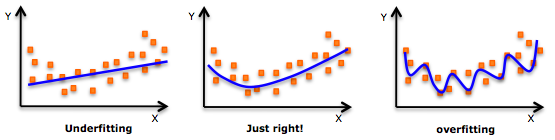

In [ ]:
# Evaluation Metrics Error  and Accuracy
# Gradiaent Descent
# Intro to Logistic Regression

# Classification


In classification target value will be discrete in Nature.

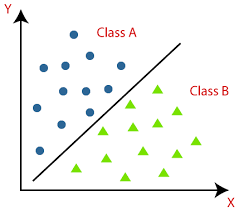

### Logistic Regression
```
Sigmoid Function
sigmoid = 1/1+e^-z
Result always will be inside the 0 to 1.

Here binary classification comes in pictures where all the value will be between 0 and 1.
This is called Logistic regression
```

In [ ]:
import seaborn as sns

In [ ]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
df = sns.load_dataset('titanic')
df.head()

survived  pclass     sex   age  sibsp  parch  ...    who adult_male deck  embark_town  alive  alone
0         0       3    male  22.0      1      0  ...    man       True  NaN  Southampton     no  False
1         1       1  female  38.0      1      0  ...  woman      False    C    Cherbourg    yes  False
2         1       3  female  26.0      0      0  ...  woman      False  NaN  Southampton    yes   True
3         1       1  female  35.0      1      0  ...  woman      False    C  Southampton    yes  False
4         0       3    male  35.0      0      0  ...    man       True  NaN  Southampton     no   True

[5 rows x 15 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


```
age, embarked, embarked_town and deck have empty data
```

In [ ]:
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

```
Note: If there is big gap between min and max value, then there is a chance of outliers
```

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

Note: ```There is data leakage chance when target value will be there in the datatsets. Our target value is survived column but other column alive is there that is exposing the same data. In such case our model will not learn anything. And also we will split data into test, train and validation data, None of them will be shared between them, to avoid the data leakage. ```

### Titanic Project 2024 - Logistic Regression


**Problem Statement**
1. Who survived and why , what is the combination of feature to have high probablity to survive on that ship.
2. Who did'nt survived and why , what is the combination of feature to have high probablity to not survive on that ship.

Note: Never delete those columns where there is high correlation.
Note: Makes notes of all the variable and their details in projects to have better understanding

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset('titanic')
df.head()

survived  pclass     sex   age  sibsp  parch  ...    who adult_male deck  embark_town  alive  alone
0         0       3    male  22.0      1      0  ...    man       True  NaN  Southampton     no  False
1         1       1  female  38.0      1      0  ...  woman      False    C    Cherbourg    yes  False
2         1       3  female  26.0      0      0  ...  woman      False  NaN  Southampton    yes   True
3         1       1  female  35.0      1      0  ...  woman      False    C  Southampton    yes  False
4         0       3    male  35.0      0      0  ...    man       True  NaN  Southampton     no   True

[5 rows x 15 columns]

<Axes: xlabel='sex', ylabel='count'>

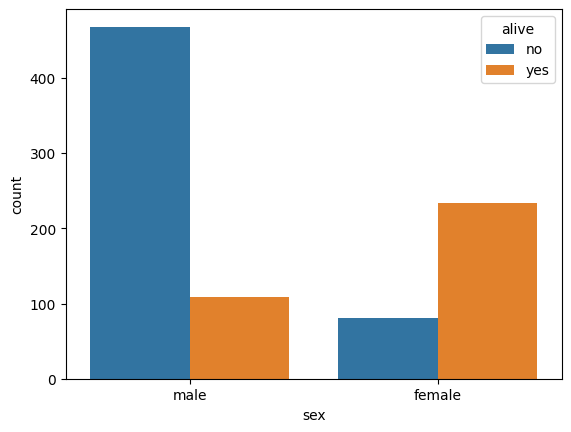

In [ ]:
sns.countplot(data=df,
              x='sex',
              hue='alive')

```
# It will plot male and female and there ratio of survival
# In the plot will be able to see female more surviving than Man
```

<Axes: >

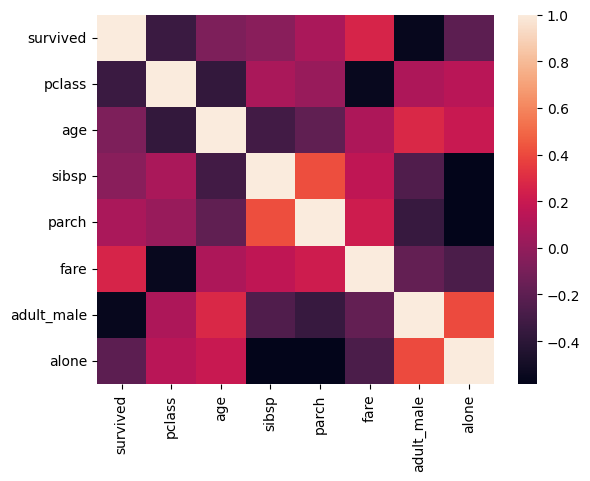

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: >

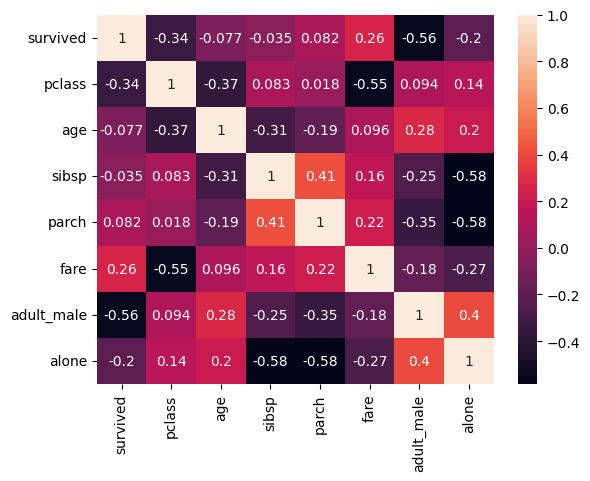

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
df.head()

survived  pclass     sex   age  sibsp  parch  ...    who adult_male deck  embark_town  alive  alone
0         0       3    male  22.0      1      0  ...    man       True  NaN  Southampton     no  False
1         1       1  female  38.0      1      0  ...  woman      False    C    Cherbourg    yes  False
2         1       3  female  26.0      0      0  ...  woman      False  NaN  Southampton    yes   True
3         1       1  female  35.0      1      0  ...  woman      False    C  Southampton    yes  False
4         0       3    male  35.0      0      0  ...    man       True  NaN  Southampton     no   True

[5 rows x 15 columns]

#### 1. By Gender

In [ ]:
df.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
df.sex.value_counts(normalize=True)*100

sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

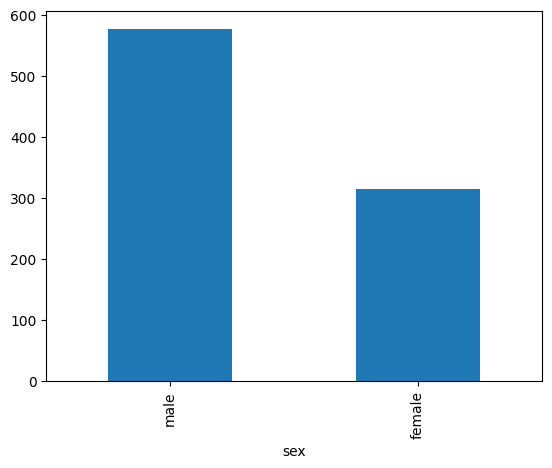

In [ ]:
df.sex.value_counts().plot(kind='bar')
plt.show()

In [ ]:
pd.crosstab(df.sex, df.alive)

alive    no  yes
sex             
female   81  233
male    468  109

<Axes: xlabel='sex', ylabel='count'>

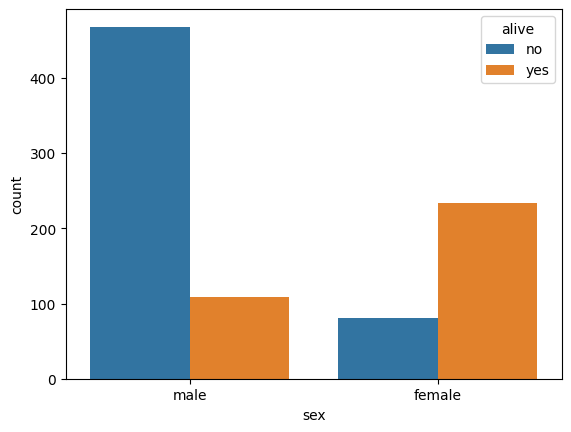

In [ ]:
sns.countplot(data=df,
             x='sex',
             hue='alive')

#### 2. By Class
Will try to observe if we can find any hidden relationship between survival and class of the people

In [ ]:
df.pclass.unique()

array([3, 1, 2])

In [ ]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [ ]:
pd.crosstab(df.pclass, df.alive)

alive    no  yes
pclass          
1        80  136
2        97   87
3       372  119

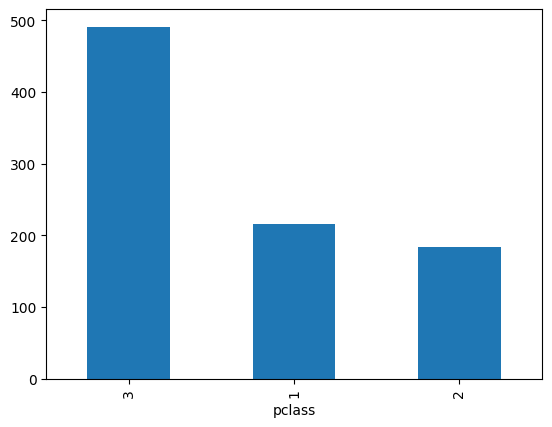

In [ ]:
df.pclass.value_counts().plot(kind="bar")
plt.show()

<Axes: xlabel='class', ylabel='count'>

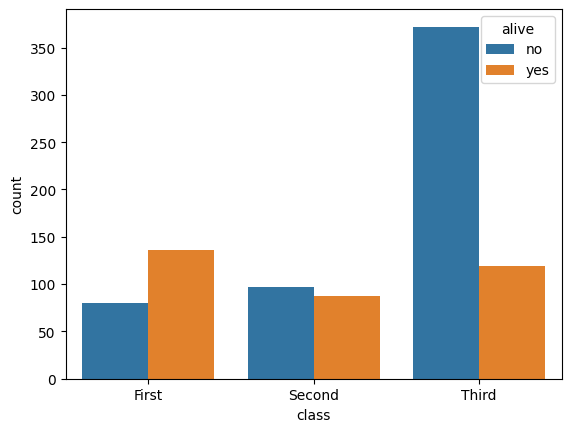

In [ ]:
sns.countplot(data=df,
              x='class',
              hue='alive')

#### 3. By class and Gender

In [ ]:
pd.crosstab(df.pclass, df.sex)

sex     female  male
pclass              
1           94   122
2           76   108
3          144   347

<Axes: xlabel='class', ylabel='count'>

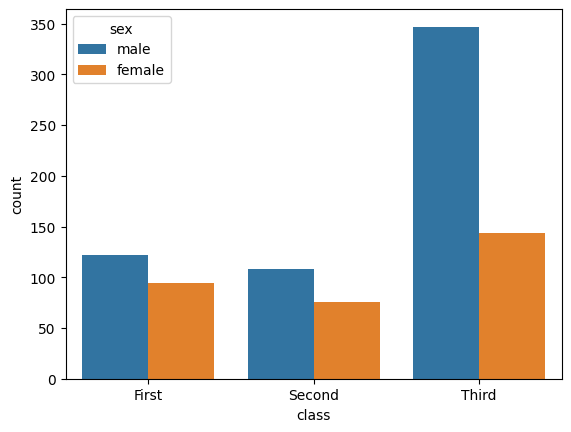

In [ ]:
sns.countplot(data=df,
             x='class',
             hue='sex')

Note: Above graph showing More male in third class as compared to female.

#### By Age & Fare

In [ ]:
df.age.isnull().sum()

177

<Axes: ylabel='Frequency'>

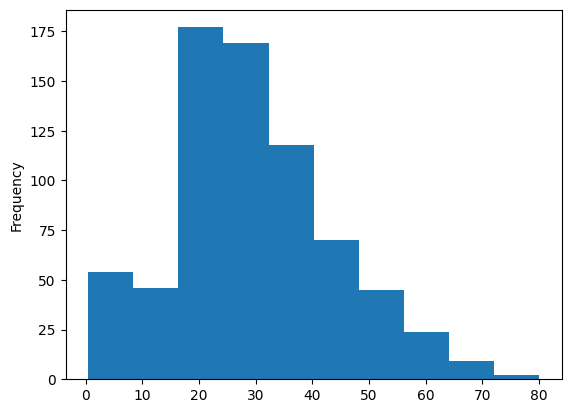

In [ ]:
df.age.plot(kind='hist')

<Axes: ylabel='Frequency'>

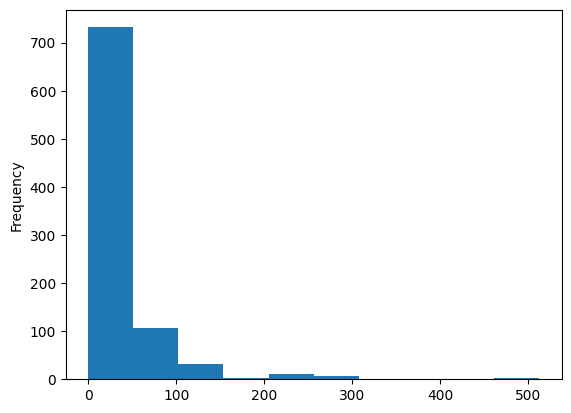

In [ ]:
df.fare.plot(kind='hist')

In [ ]:
df.fare.mean()

32.204207968574636

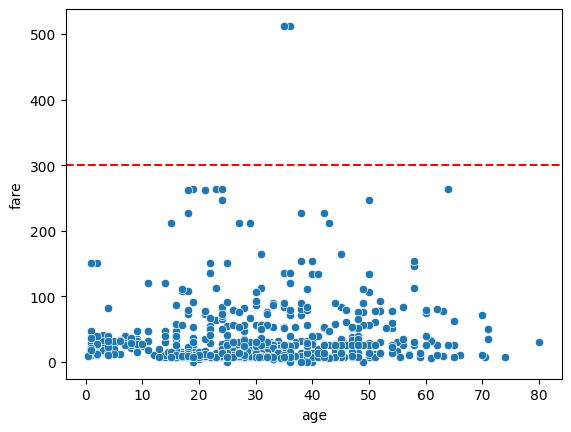

In [ ]:
sns.scatterplot(data=df,
              x='age',
              y='fare')
plt.axhline(y=300, color='red', linestyle='--')

<Axes: xlabel='age', ylabel='fare'>

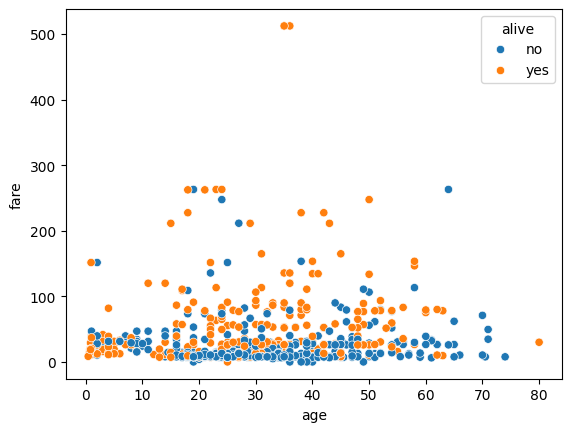

In [ ]:
sns.scatterplot(data=df,
              x='age',
              y='fare',
              hue='alive')

Observation:

1.

#### By All the features

In [ ]:
df.head()

survived  pclass     sex   age  sibsp  parch  ...    who adult_male deck  embark_town  alive  alone
0         0       3    male  22.0      1      0  ...    man       True  NaN  Southampton     no  False
1         1       1  female  38.0      1      0  ...  woman      False    C    Cherbourg    yes  False
2         1       3  female  26.0      0      0  ...  woman      False  NaN  Southampton    yes   True
3         1       1  female  35.0      1      0  ...  woman      False    C  Southampton    yes  False
4         0       3    male  35.0      0      0  ...    man       True  NaN  Southampton     no   True

[5 rows x 15 columns]

In [ ]:
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [ ]:
df.corr(numeric_only=True)

survived    pclass       age     sibsp     parch      fare  adult_male     alone
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   -0.557080 -0.203367
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500    0.094035  0.135207
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067    0.280328  0.198270
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   -0.253586 -0.584471
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   -0.349943 -0.583398
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   -0.182024 -0.271832
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024    1.000000  0.404744
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832    0.404744  1.000000

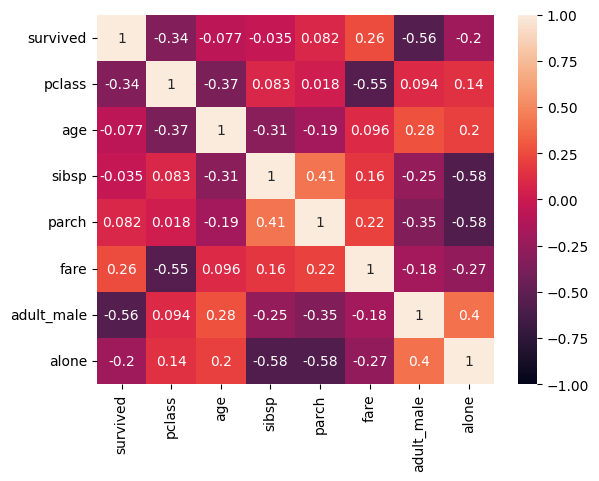

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1)
plt.show()

Heatmap gives correlation between all the variables and also it will give the relation with target value.

#### Dropping Useless columns

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
to_drop = ['embark_town', 'alive', 'deck']

# deck having heavy null value
# alive is duplicate columns cause data leakage

In [ ]:
df.isnull().sum()>0

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [ ]:
df.drop(to_drop, axis=1, inplace=True)

In [ ]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False   True
3         1       1  female  35.0      1      0  53.1000        S  First  woman       False  False
4         0       3    male  35.0      0      0   8.0500        S  Third    man        True   True

<bound method Series.mean of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64>


<Axes: ylabel='Density'>

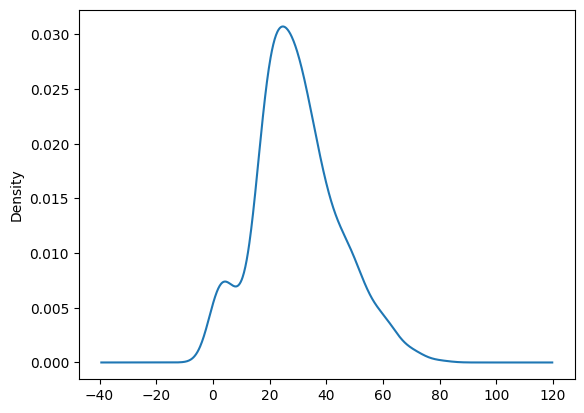

In [ ]:
print(df.age.mean)
df.age.plot(kind='kde')

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

age         177
embarked      2
dtype: int64

In [ ]:
df.embarked.mode()[0]

'S'

**Note: Why we require indexing over mode ???**

#### Filling the Missing Values

In [ ]:
df.age.fillna(df.age.mean(), inplace=True)

In [ ]:
df.embarked.fillna(df.embarked.mode()[0], inplace=True)

<ipython-input-590-c78fe65a7688>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.embarked.fillna(df.embarked.mode()[0], inplace=True)


In [ ]:
df.head(2)

survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False  False

In [ ]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

#### Outliner, Encoding, Scaling

Outliner


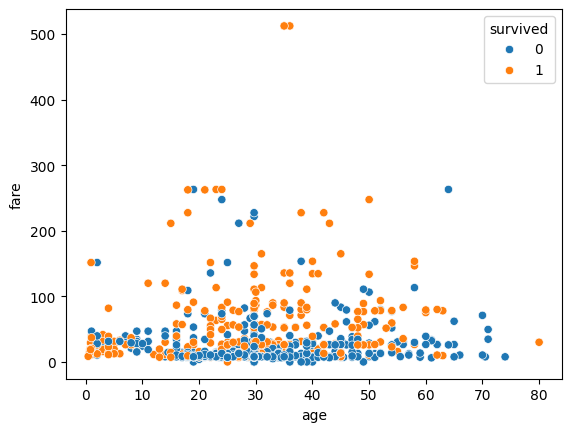

In [ ]:
sns.scatterplot(data=df,
                x='age',
                y='fare',
                hue='survived')
plt.show()

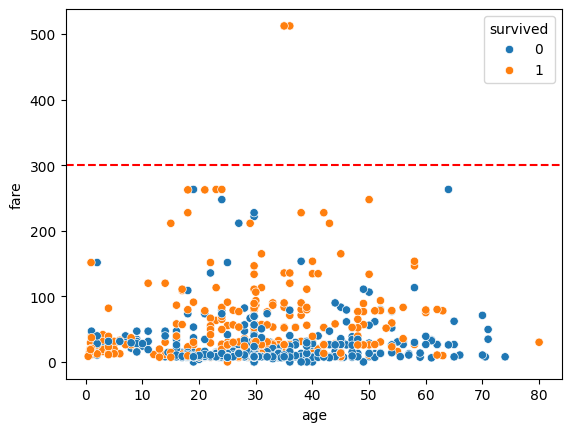

In [ ]:
sns.scatterplot(data=df,
                x='age',
                y='fare',
                hue='survived')
plt.axhline(y=300, color='red', linestyle='--')
plt.show()

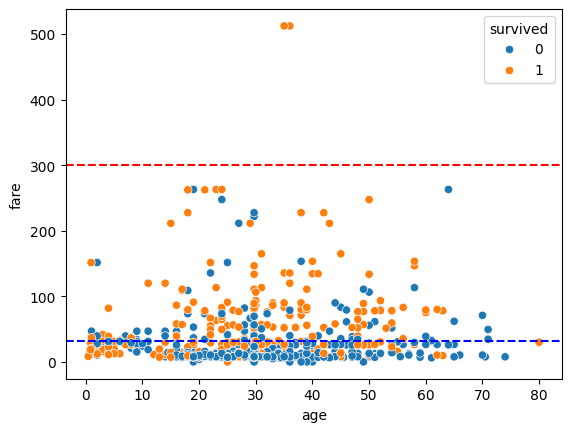

In [ ]:
sns.scatterplot(data=df,
                x='age',
                y='fare',
                hue='survived')
plt.axhline(y=300, color='red', linestyle='--')
plt.axhline(y=df.fare.mean(), color='blue', linestyle='--')
plt.show()

In [ ]:
df.fare[df.fare>300]

258    512.3292
679    512.3292
737    512.3292
Name: fare, dtype: float64

In [ ]:
df[df.fare>300]

survived  pclass     sex   age  sibsp  ...  embarked  class    who adult_male  alone
258         1       1  female  35.0      0  ...         C  First  woman      False   True
679         1       1    male  36.0      0  ...         C  First    man       True  False
737         1       1    male  35.0      0  ...         C  First    man       True   True

[3 rows x 12 columns]

These 3 people paid highest amount, they all survived, so we cannot remove them. But we can replace them and bring near 300

We cannot replace this data with mean, because at mean value, there could be not also the chances of survival

In [ ]:
df.fare[df.fare>250]

27     263.0000
88     263.0000
258    512.3292
311    262.3750
341    263.0000
438    263.0000
679    512.3292
737    512.3292
742    262.3750
Name: fare, dtype: float64

In [ ]:
df.fare[df.fare>300] = 300

<ipython-input-599-a23cde8fe644>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.fare[df.fare>300] = 300
<ipython-input-599-a23cde8fe644>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

In [ ]:
df[df['class']=='First']

survived  pclass     sex   age  sibsp  ...  embarked  class    who adult_male  alone
1           1       1  female  38.0      1  ...         C  First  woman      False  False
3           1       1  female  35.0      1  ...         S  First  woman      False  False
6           0       1    male  54.0      0  ...         S  First    man       True   True
11          1       1  female  58.0      0  ...         S  First  woman      False   True
23          1       1    male  28.0      0  ...         S  First    man       True   True
..        ...     ...     ...   ...    ...  ...       ...    ...    ...        ...    ...
871         1       1  female  47.0      1  ...         S  First  woman      False  False
872         0       1    male  33.0      0  ...         S  First    man       True   True
879         1       1  female  56.0      0  ...         C  First  woman      False  False
887         1       1  female  19.0      0  ...         S  First  woman      False   True
889         1       1    male  26.0      0  ...         C  First    man       True   True

[216 rows x 12 columns]

In [ ]:
df.fare[df.fare<300][df['class']=='First'].mean()

78.12406056338027

So, it does look taking avg is the solution so we wil go with top assumed value eg 300

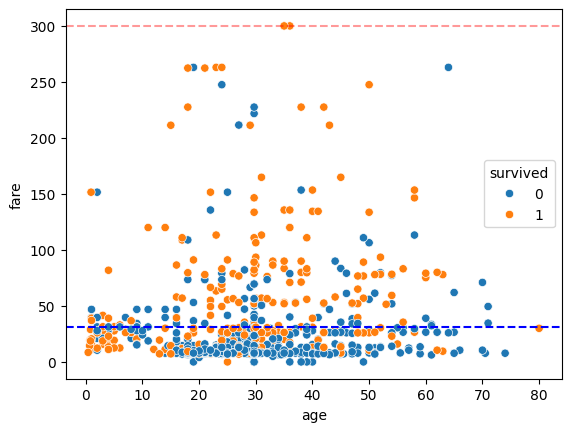

In [ ]:
sns.scatterplot(data=df,
                x='age',
                y='fare',
                hue='survived')
plt.axhline(y=300, color='red', linestyle='--',alpha=.4)
plt.axhline(y=df.fare.mean(), color='blue', linestyle='--')
plt.show()
# alpha 0-1 0=transparent 1= opaque

In [ ]:
#sns.pairplot(df)

In [ ]:
#sns.jointplot(data=df, x='age', y='fare', hue='survived')

In [ ]:
#sns.swarmplot(data=df, y='fare', hue='survived')

In [ ]:
#sns.violinplot(data=df, y='fare', hue='survived')

In [ ]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False   True
3         1       1  female  35.0      1      0  53.1000        S  First  woman       False  False
4         0       3    male  35.0      0      0   8.0500        S  Third    man        True   True

In [ ]:
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   31.489295
std      0.486592    0.836071   13.002015    1.102743    0.806057   43.973014
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  300.000000

In [ ]:
# x,xt,y,yt = train_test_split(data.drop(columns='survived'),
#                              data.survived,
#                              test_size=0.10,
#                              random_state=42)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

In [ ]:
# mms=MinMaxScaler()

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
df[["fare","age"]].head()

fare   age
0   7.2500  22.0
1  71.2833  38.0
2   7.9250  26.0
3  53.1000  35.0
4   8.0500  35.0

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

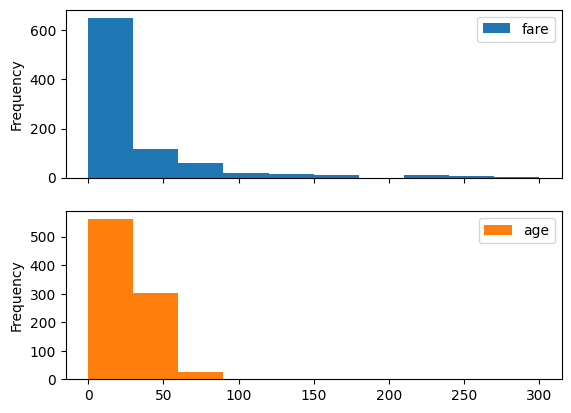

In [ ]:
df[["fare","age"]].plot(kind="hist",subplots=True)

In [ ]:
# mms.fit_transform(df[["fare","age"]])

In [ ]:
# df[["fare","age"]]= mms.fit_transform(df[["fare","age"]]) # Will do seperately for test and train data

In [ ]:
# x[["fare","age"]].head()

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

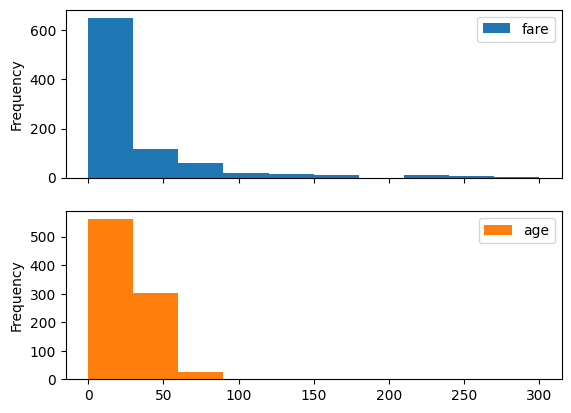

In [ ]:
df[["fare","age"]].plot(kind="hist",subplots=True)

#### Encoding (with getdummies())
Data encoding is a crucial step in machine learning that involves converting categorical or textual data into a numerical format that machine learning algorithms can understand. This process helps improve the accuracy and efficiency of machine learning models.

Machine only understand only numbers not string or any categorical data, so we need to do encoding.

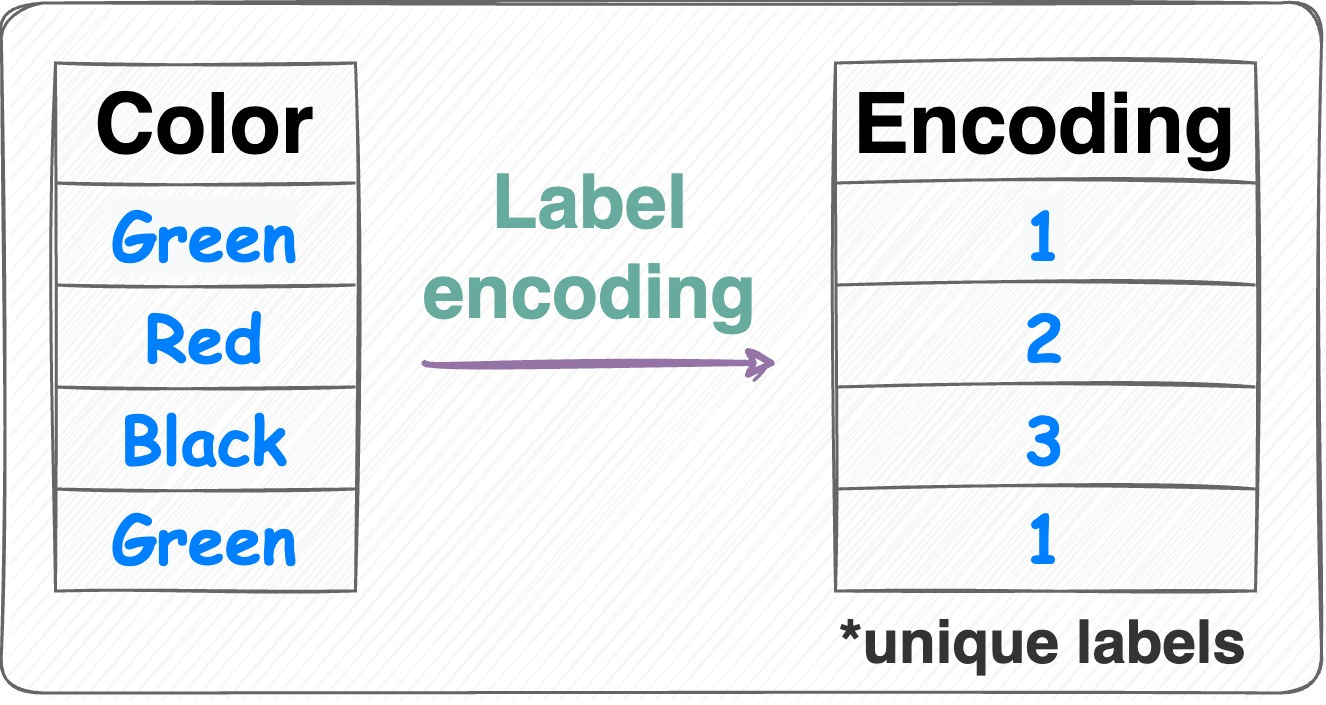

String Text
1. Ordinal Data (Order in data)
2. Nominal Data (sex, class, alone, adult_male data Nominal)

Using **`getdummies()`** method
Pandas encoding technique for Nominal data

Note: pclass is already converted to numeric of class

```
>>> import pandas as pd
>>> s = pd.Series(list('abca'))
>>> get_dummies(s)
   a  b  c
0  1  0  0
1  0  1  0
2  0  0  1
3  1  0  0
```

In [ ]:
x.head()

pclass       age      fare  alone  child  family  sex_male  embarked_Q  embarked_S
165     3.0  0.107816  0.068417    0.0    1.0     2.0       1.0         0.0         1.0
541     3.0  0.107816  0.104250    0.0    1.0     6.0       0.0         0.0         1.0
625     1.0  0.761247  0.107736    1.0    0.0     0.0       1.0         0.0         1.0
388     3.0  0.367921  0.025764    1.0    0.0     0.0       1.0         1.0         0.0
76      3.0  0.367921  0.026319    1.0    0.0     0.0       1.0         0.0         1.0

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alone'],
      dtype='object')

In [ ]:
df.drop(columns='class', inplace=True)

In [ ]:
df.head(1)

survived  pclass   sex   age  sibsp  parch  fare embarked  who  adult_male  alone
0         0       3  male  22.0      1      0  7.25        S  man        True  False

In [ ]:
df.who.unique()

array(['man', 'woman', 'child'], dtype=object)

**`Heatmap`**
A heat map is a data visualization tool that can be used in machine learning (ML) to show patterns in data and help identify areas that need attention

In [ ]:
pd.get_dummies(df,drop_first=False).astype(float).head()

survived  pclass   age  sibsp  parch  ...  embarked_Q  embarked_S  who_child  who_man  who_woman
0       0.0     3.0  22.0    1.0    0.0  ...         0.0         1.0        0.0      1.0        0.0
1       1.0     1.0  38.0    1.0    0.0  ...         0.0         0.0        0.0      0.0        1.0
2       1.0     3.0  26.0    0.0    0.0  ...         0.0         1.0        0.0      0.0        1.0
3       1.0     1.0  35.0    1.0    0.0  ...         0.0         1.0        0.0      0.0        1.0
4       0.0     3.0  35.0    0.0    0.0  ...         0.0         1.0        0.0      1.0        0.0

[5 rows x 16 columns]

Here Will get the multiple columns by getdummies method based on data, like for sex data will get sex_male and sex_female

Similary embarked have 3 unique data, so for that we will get three dummies columns

and for child we will get who_man, who_women and who_child columns

In [ ]:
pd.get_dummies(df,drop_first=True).astype(float).head()

survived  pclass   age  sibsp  parch  ...  sex_male  embarked_Q  embarked_S  who_man  who_woman
0       0.0     3.0  22.0    1.0    0.0  ...       1.0         0.0         1.0      1.0        0.0
1       1.0     1.0  38.0    1.0    0.0  ...       0.0         0.0         0.0      0.0        1.0
2       1.0     3.0  26.0    0.0    0.0  ...       0.0         0.0         1.0      0.0        1.0
3       1.0     1.0  35.0    1.0    0.0  ...       0.0         0.0         1.0      0.0        1.0
4       0.0     3.0  35.0    0.0    0.0  ...       1.0         0.0         1.0      1.0        0.0

[5 rows x 13 columns]

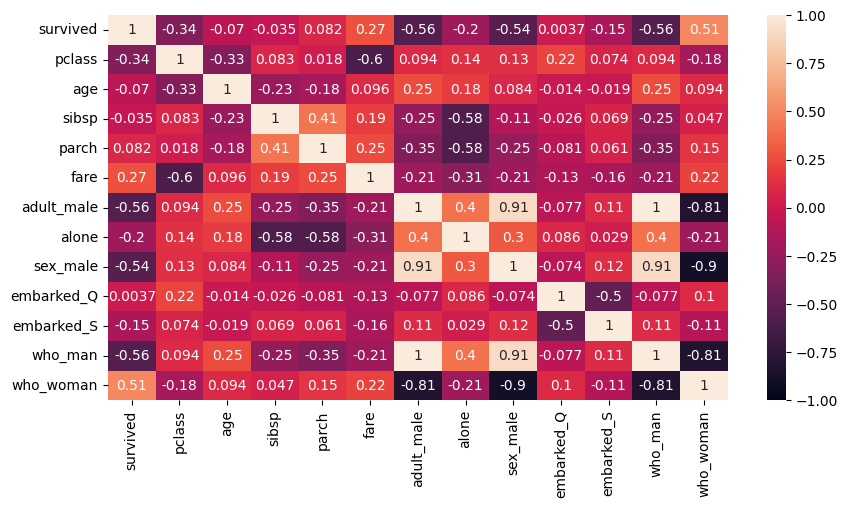

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.get_dummies(df, drop_first=True).astype(float).corr(numeric_only=True), annot=True, vmin=-1)
plt.show()

**`Observation`** is that child is not heavily corelated with any column, but male ad feamle are so we will convert who column to a child column --> child Yes 1 / NO 0

In [ ]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked    who  adult_male  alone
0         0       3    male  22.0      1      0   7.2500        S    man        True  False
1         1       1  female  38.0      1      0  71.2833        C  woman       False  False
2         1       3  female  26.0      0      0   7.9250        S  woman       False   True
3         1       1  female  35.0      1      0  53.1000        S  woman       False  False
4         0       3    male  35.0      0      0   8.0500        S    man        True   True

In [ ]:
df['child'] = df.who.replace({'man': 0, 'woman': 0, 'child': 1})

<ipython-input-628-efdd2aded500>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['child'] = df.who.replace({'man': 0, 'woman': 0, 'child': 1})


In [ ]:
df.head(2)

survived  pclass     sex   age  sibsp  parch     fare embarked    who  adult_male  alone  child
0         0       3    male  22.0      1      0   7.2500        S    man        True  False      0
1         1       1  female  38.0      1      0  71.2833        C  woman       False  False      0

In [ ]:
df['family'] = df.sibsp + df.parch

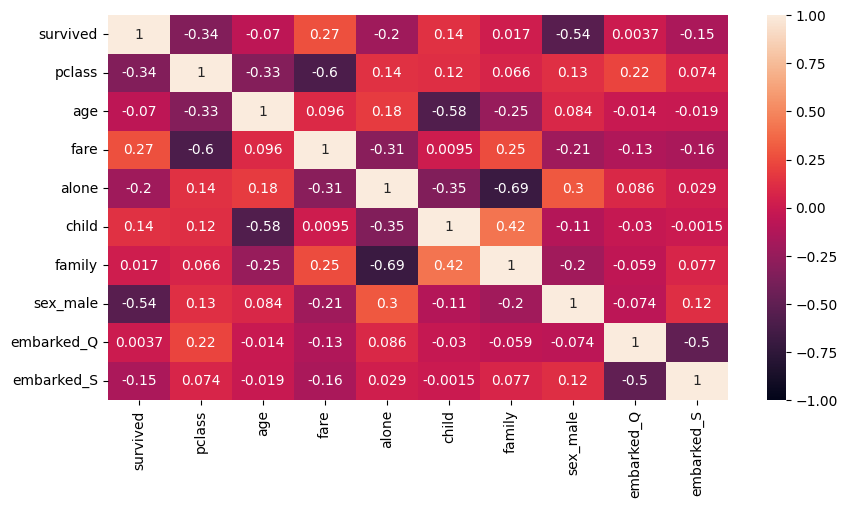

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.get_dummies(df.drop(columns=['who', 'adult_male', 'sibsp', 'parch']), drop_first=True).astype(float).corr(numeric_only=True), annot=True, vmin=-1)
plt.show()

In [ ]:
df.drop(columns=['who','adult_male','sibsp','parch'],inplace=True)

In [ ]:
df.head()

survived  pclass     sex   age     fare embarked  alone  child  family
0         0       3    male  22.0   7.2500        S  False      0       1
1         1       1  female  38.0  71.2833        C  False      0       1
2         1       3  female  26.0   7.9250        S   True      0       0
3         1       1  female  35.0  53.1000        S  False      0       1
4         0       3    male  35.0   8.0500        S   True      0       0

In [ ]:
pd.get_dummies(df).head()

survived  pclass   age     fare  alone  ...  sex_female  sex_male  embarked_C  embarked_Q  embarked_S
0         0       3  22.0   7.2500  False  ...       False      True       False       False        True
1         1       1  38.0  71.2833  False  ...        True     False        True       False       False
2         1       3  26.0   7.9250   True  ...        True     False       False       False        True
3         1       1  35.0  53.1000  False  ...        True     False       False       False        True
4         0       3  35.0   8.0500   True  ...       False      True       False       False        True

[5 rows x 12 columns]

In [ ]:
pd.get_dummies(df,drop_first=True).astype(float).head(3) # will not do int because age and fair become zero

survived  pclass   age     fare  alone  child  family  sex_male  embarked_Q  embarked_S
0       0.0     3.0  22.0   7.2500    0.0    0.0     1.0       1.0         0.0         1.0
1       1.0     1.0  38.0  71.2833    0.0    0.0     1.0       0.0         0.0         0.0
2       1.0     3.0  26.0   7.9250    1.0    0.0     0.0       0.0         0.0         1.0

In [ ]:
# dtype=float
pd.get_dummies(df,drop_first=True,dtype=float).head(3)

survived  pclass   age     fare  alone  child  family  sex_male  embarked_Q  embarked_S
0         0       3  22.0   7.2500  False      0       1       1.0         0.0         1.0
1         1       1  38.0  71.2833  False      0       1       0.0         0.0         0.0
2         1       3  26.0   7.9250   True      0       0       0.0         0.0         1.0

In [ ]:
data = pd.get_dummies(df, drop_first=True).astype(float).copy()
data.head()

survived  pclass   age     fare  alone  child  family  sex_male  embarked_Q  embarked_S
0       0.0     3.0  22.0   7.2500    0.0    0.0     1.0       1.0         0.0         1.0
1       1.0     1.0  38.0  71.2833    0.0    0.0     1.0       0.0         0.0         0.0
2       1.0     3.0  26.0   7.9250    1.0    0.0     0.0       0.0         0.0         1.0
3       1.0     1.0  35.0  53.1000    0.0    0.0     1.0       0.0         0.0         1.0
4       0.0     3.0  35.0   8.0500    1.0    0.0     0.0       1.0         0.0         1.0

#### Train Test Split

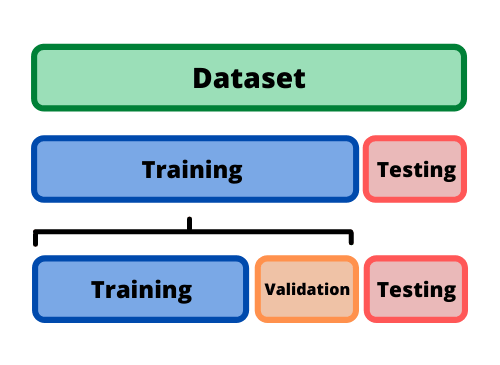

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x,xt,y,yt =train_test_split(data.drop(columns="survived"),
                            data.survived,
                            test_size=.10,
                            random_state=42)

```
x, y ---> Training data
xt, yt ---> Testing Data
```

#### Scaling (with MinMaxScaler)
1. Suppose we have data where there is high magnitude difference between the data
2. ML gives more importance to high value
3. Data scaling is the process of transforming the values of the features of a dataset till they are within a specific range, e.g. 0 to 1 or -1 to 1. This is to ensure that no single feature dominates the distance calculations in an algorithm, and can help to improve the performance of the algorithm
3. Scaling mean bringing the entire data into between 0 and 1
5. Help in detecting the outliers also.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()

In [ ]:
x[["fare","age"]].head()

fare        age
165  20.5250   9.000000
541  31.2750   9.000000
625  32.3208  61.000000
388   7.7292  29.699118
76    7.8958  29.699118

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

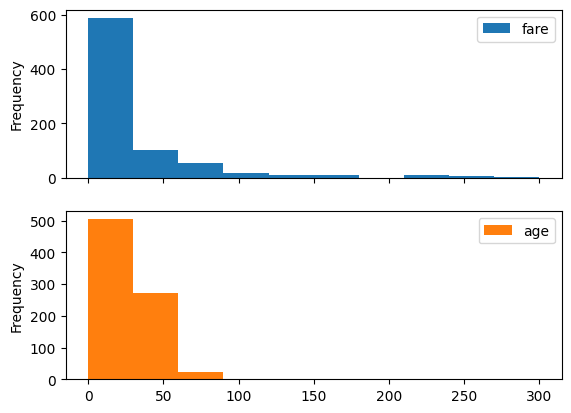

In [ ]:
x[["fare","age"]].plot(kind="hist",subplots=True)

In [ ]:
mms.fit_transform(x[["fare","age"]])[:10]

array([[0.06841667, 0.10781603],
       [0.10425   , 0.10781603],
       [0.107736  , 0.76124654],
       [0.025764  , 0.36792055],
       [0.02631933, 0.36792055],
       [0.02618067, 0.34656949],
       [0.17333333, 0.59788892],
       [0.02683333, 0.560191  ],
       [0.04333333, 0.44709726],
       [0.02631933, 0.33400352]])

In [ ]:
x[["fare","age"]]=mms.fit_transform(x[["fare","age"]]) # fit_transform on train data
xt[["fare","age"]]=mms.transform(xt[["fare","age"]])  # transform on test data

In [ ]:
x.head(3)

pclass       age      fare  alone  child  family  sex_male  embarked_Q  embarked_S
165     3.0  0.107816  0.068417    0.0    1.0     2.0       1.0         0.0         1.0
541     3.0  0.107816  0.104250    0.0    1.0     6.0       0.0         0.0         1.0
625     1.0  0.761247  0.107736    1.0    0.0     0.0       1.0         0.0         1.0

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

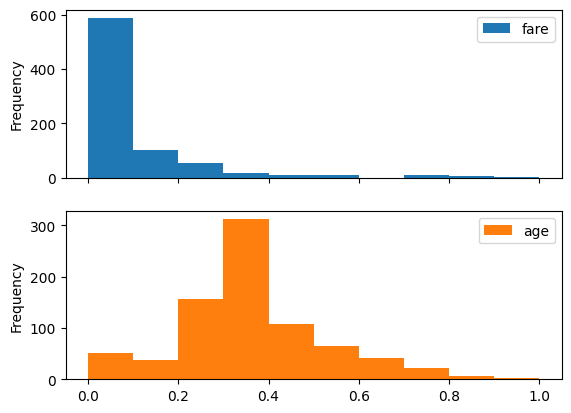

In [ ]:
x[["fare","age"]].plot(kind="hist",subplots=True)

#### Machine Learning(Model)
Using Logistic Regression (Binary Classifier)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x,y)

LogisticRegression()

Now, we will test the model with testing data

In [ ]:
predicted_result = lr.predict(xt)

In [ ]:
predicted_result

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0.])

#### Train-Test Quality of Model

In [ ]:
lr.score(x, y)

0.8089887640449438

In [ ]:
lr.score(xt, yt)

0.8444444444444444

We have one inbuilt method for checking accuracy score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(yt, predicted_result)

0.8444444444444444

In [ ]:
accuracy_score(yt, predicted_result)*100

84.44444444444444

#### Residue | Total Error


Convergence Theory in Machine Learning Formula

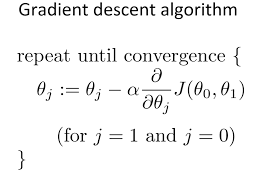

This Formula is important, how value of m is changing
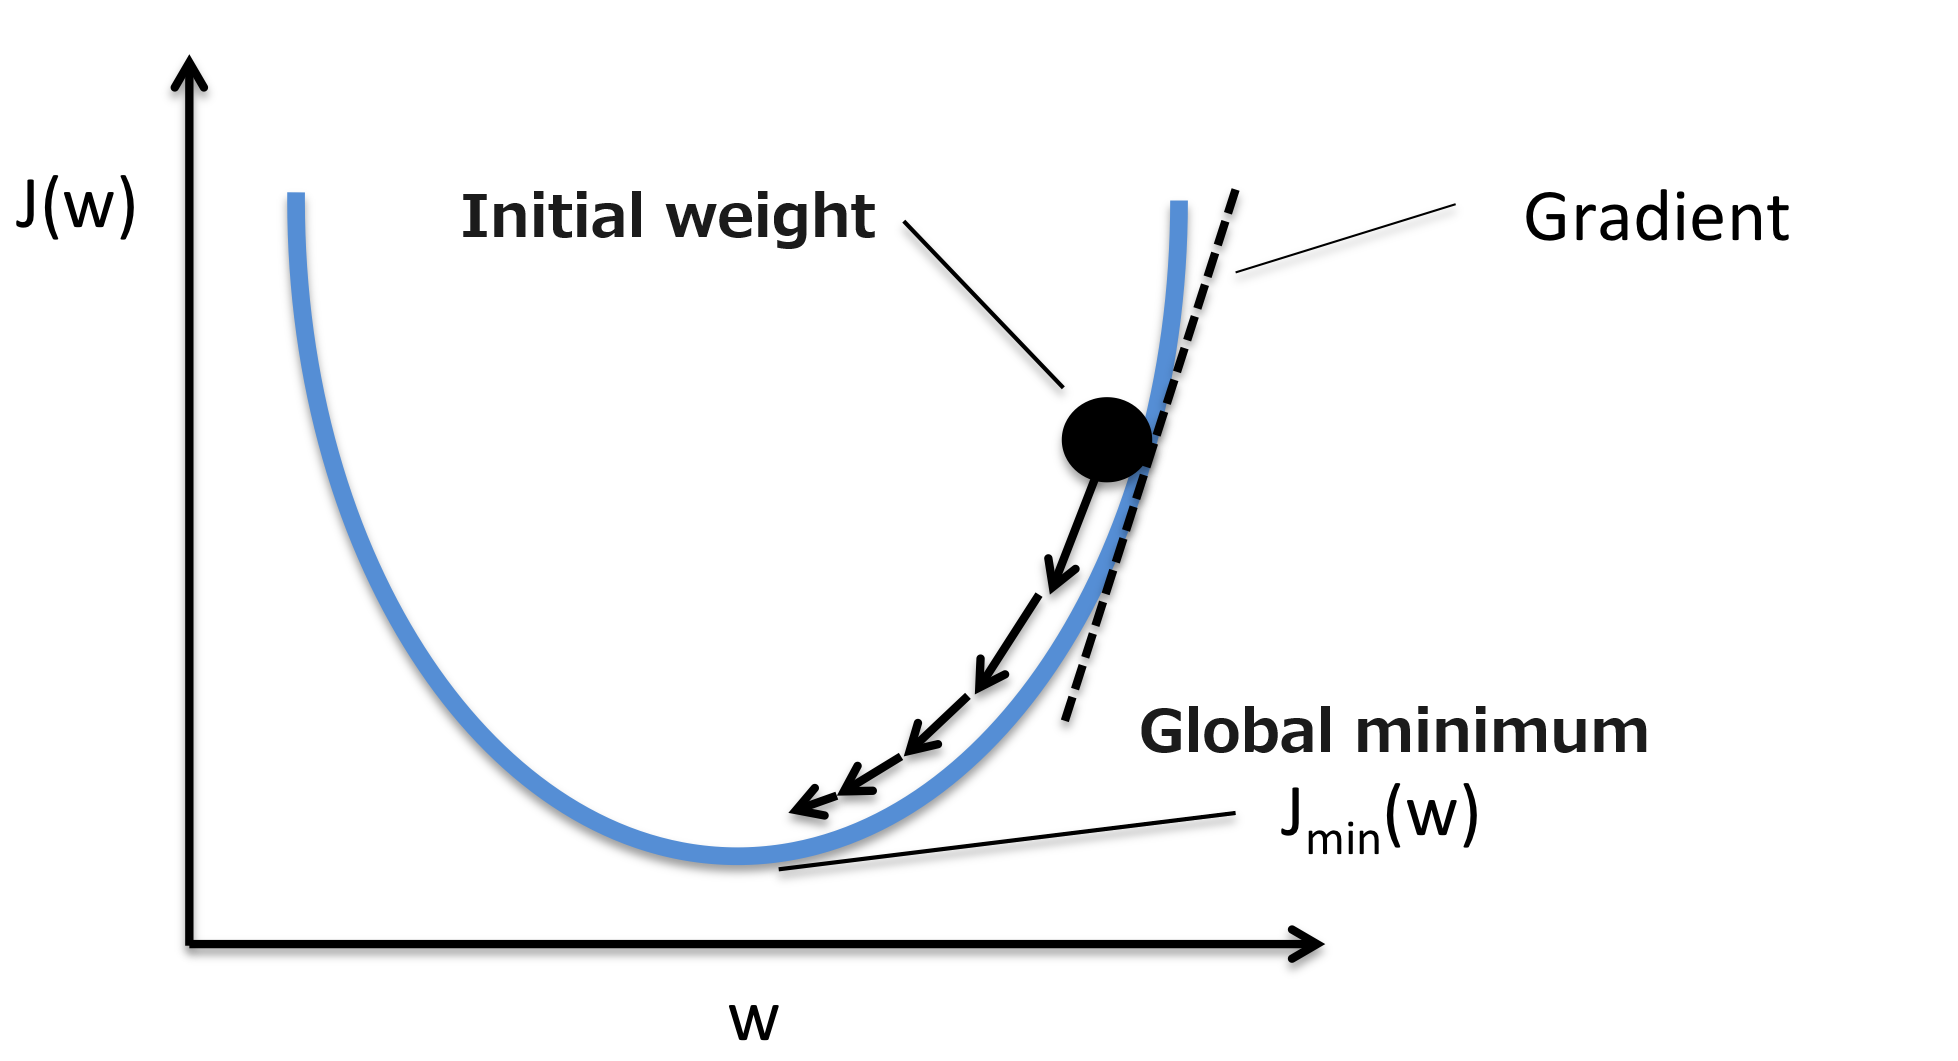

Algorithm will move error to down at global minimun, after that it will start increasing again.

In machine learning, the concept of "convergence" is typically represented by observing a decreasing loss function over training iterations, where the formula for loss depends on the specific algorithm and problem, but generally looks like this:

`Loss = 1/N * Σ (y_predicted - y_actual)^2`

as the training process progresses, this loss value should approach a minimum, indicating convergence, with "N" being the number of data points and "y_predicted" and "y_actual" being the model's prediction and true label respectively.


How Algorithm Handles:
1. Initial steps will be larger
2. but it start slowing down the rate when it start moving toward the global minimum points


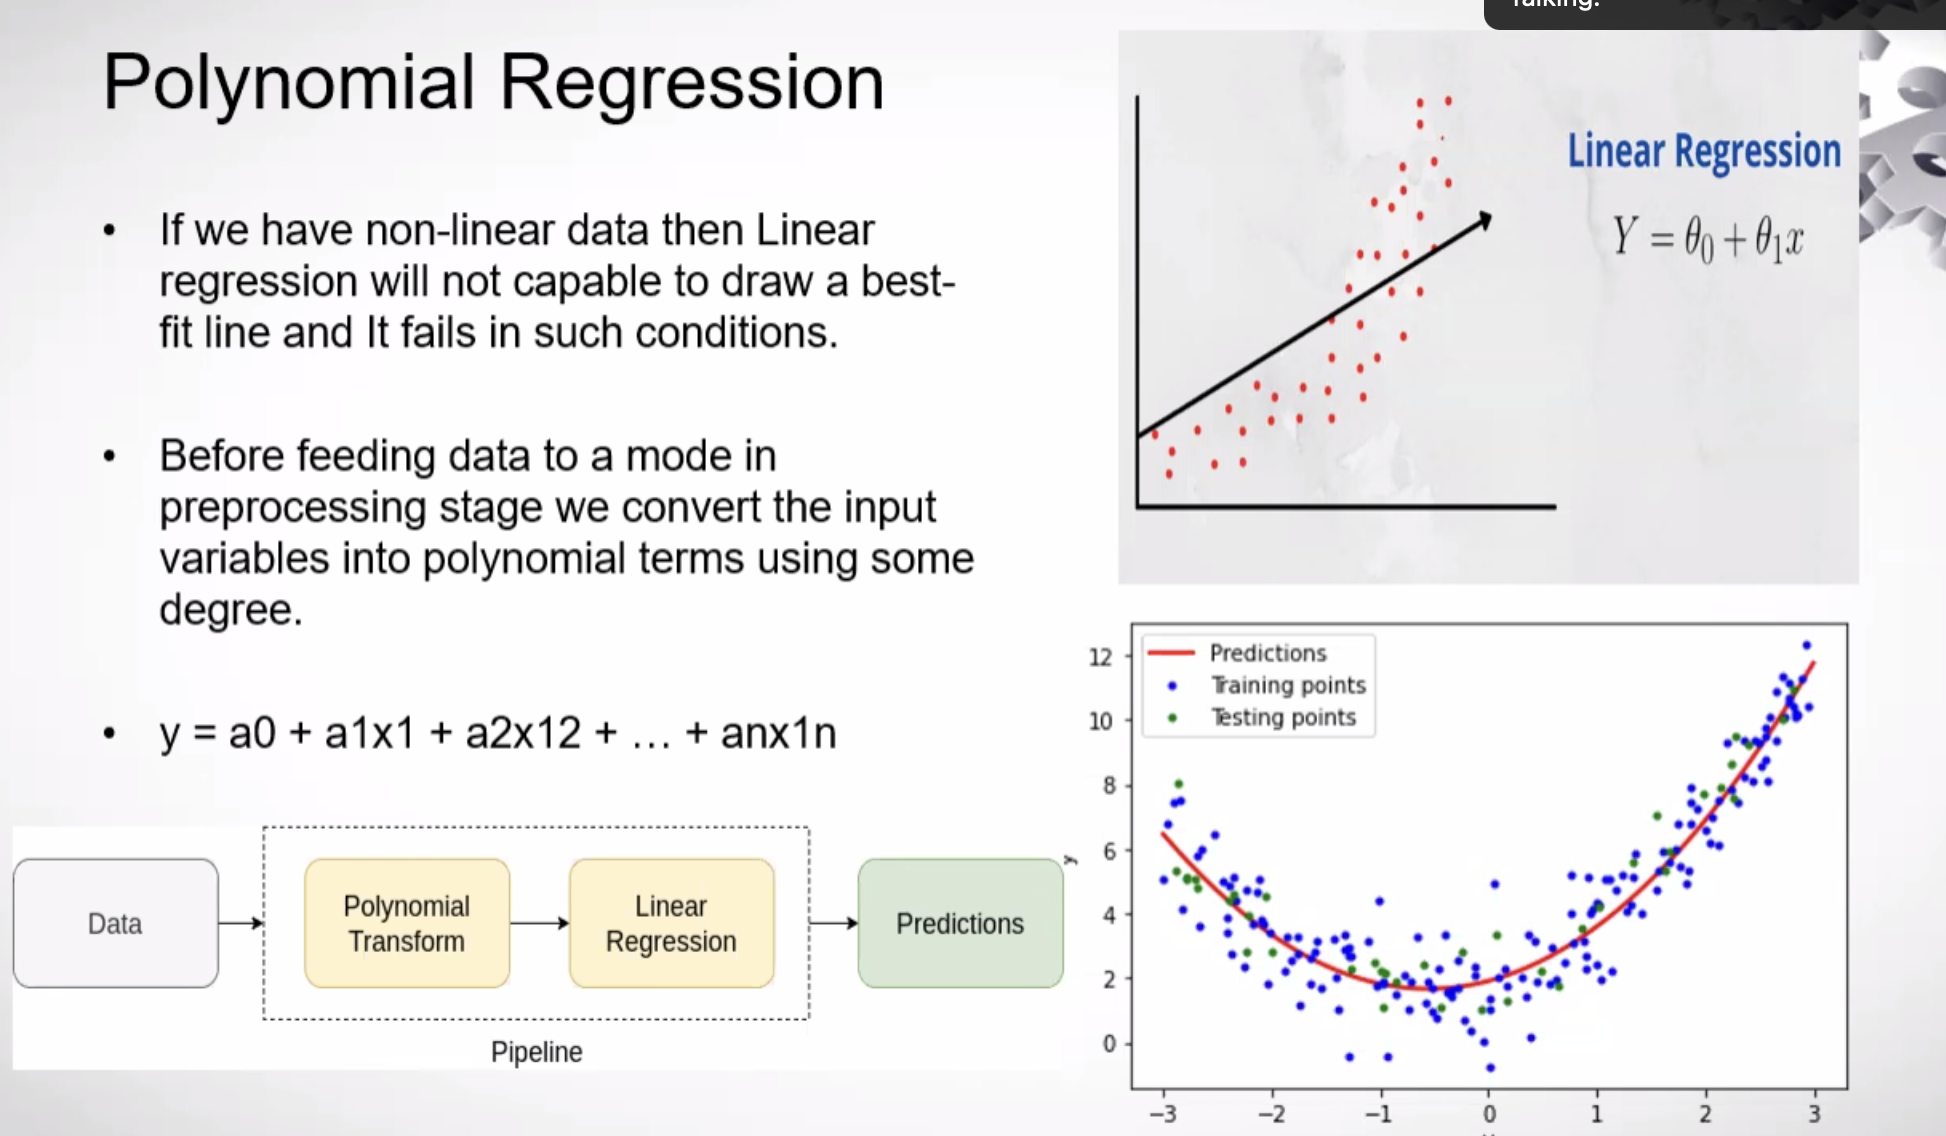

More Degree more will be the overfitting, that keeps in mind.
```
Degree 1 - linear polynomial
Degree 2 - Quadratic Polynomial (mostly prefer for polynomial)
Degree 3 and 4 - try to avoid - Cause Overfitting of data
```

### Car Crash Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Explore the data using info, describe, columns, values and shape
2. Check if data is null for any columns
3. Use boxplot, scatter plot to plot the specific data
4. Plot the heatmap to see the corr (Very Important)
5. Drop the unrelated columns
6. Split train test and use scalar

# Decision Tree

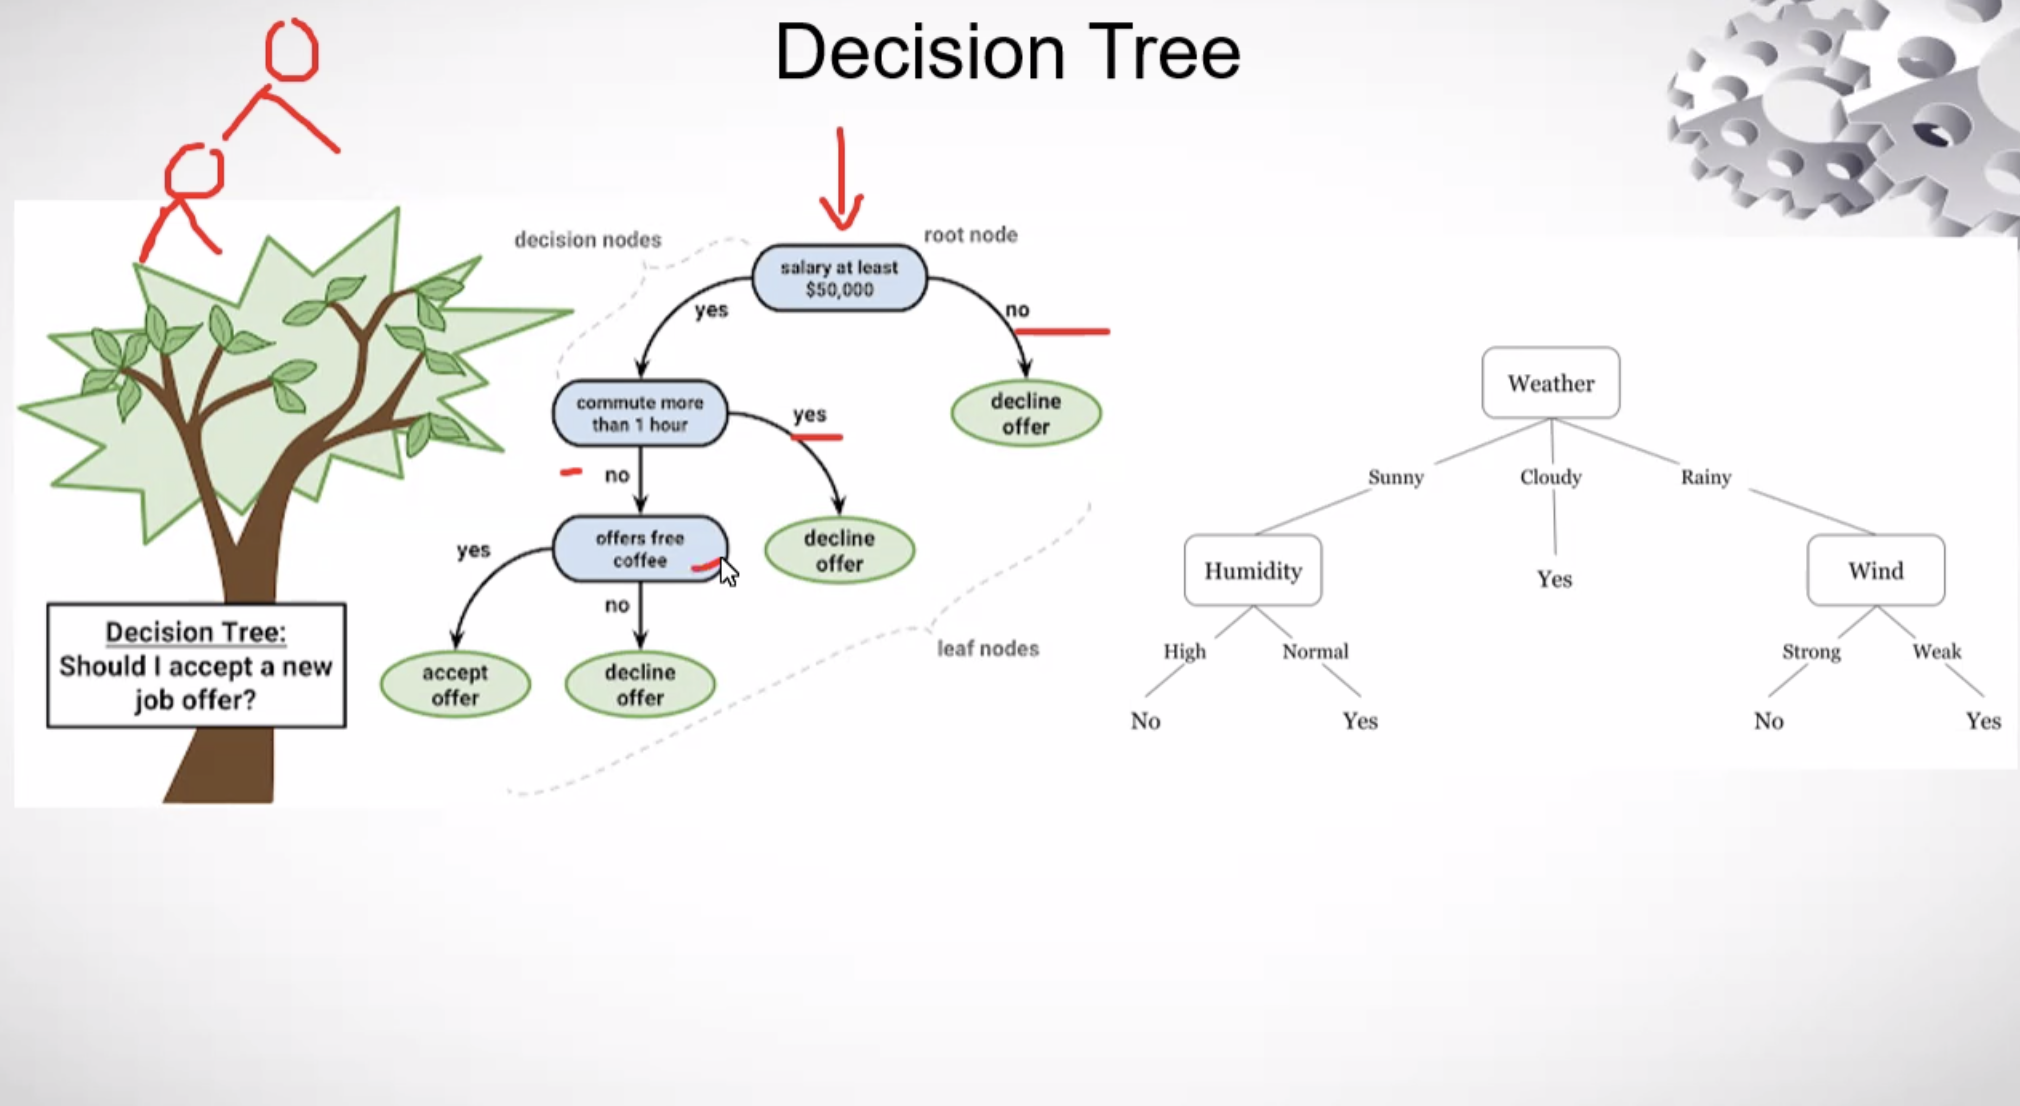

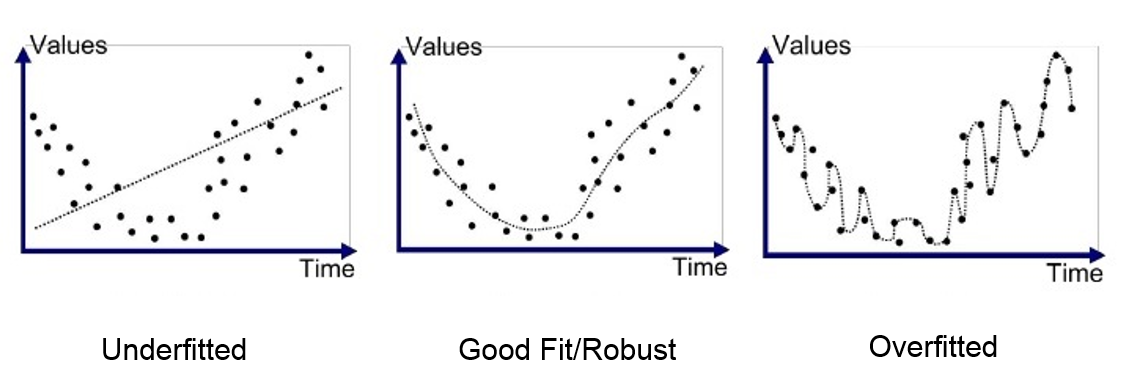

In Decision tree should have more chances of Overfitting. This we can test while check the training and testing data.

**Entropy**
1. Measure of the randomness in the information being processed.
2. The higher the entropy, the harder it is to draw any conclusion from that information.

`Higher Entropy --> Harder to get conclusion`

12 Football player --- > but all 12 people are fully random, there is nothing common.

In such case Writing ML model is very difficult. This is case of high randomness.